# importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Reading csv

In [2]:
df=pd.read_csv("kidney_disease.csv")

# understanding data and its features

In [3]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# cleaning data

# Age column 

In [7]:
# As age has 9 missing values with total of 400 values which is 2.25% of total data.
# so we remove these values
indexNames = df[ (df['age'].isnull())].index
df.drop(indexNames , inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


# bp column

In [8]:
#similarly we drop bp column
indexNames = df[ (df['bp'].isnull())].index
df.drop(indexNames , inplace=True)
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                 42
al                 41
su                 44
rbc               142
pc                 56
pcc                 3
ba                  3
bgr                39
bu                 17
sc                 15
sod                80
pot                81
hemo               48
pcv                64
wc                 96
rc                118
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# sg column

In [9]:
#sg has 47 null values which is more than 11%
#so we will not drop the column
# value has very low s.d and mean
#mean=1.017408
#50%=1.02
#so we replace value with mean+50%/2
newvalue=(1.017408+1.02)/2
newvalue
df["sg"].fillna(newvalue, inplace=True)
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                 41
su                 44
rbc               142
pc                 56
pcc                 3
ba                  3
bgr                39
bu                 17
sc                 15
sod                80
pot                81
hemo               48
pcv                64
wc                 96
rc                118
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# al column

In [10]:
#al has 41 missing values so we will not delete it
#mean
#min=0.0
#50%=0.0
#mean=1.016949
#max=5.0
#std around 1
newvalue=(5+0)/2
newvalue=(newvalue+1.016949)/2
df["al"].fillna(newvalue, inplace=True)
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                 44
rbc               142
pc                 56
pcc                 3
ba                  3
bgr                39
bu                 17
sc                 15
sod                80
pot                81
hemo               48
pcv                64
wc                 96
rc                118
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Su columns


In [11]:
df["su"].mode()

0    0.0
dtype: float64

In [12]:
(df["su"]==0).sum()

276

In [13]:
# as most frequent value is 0 equal to 276 out of 356
#so replace nan with 0
df["su"].fillna(0, inplace=True)
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               142
pc                 56
pcc                 3
ba                  3
bgr                39
bu                 17
sc                 15
sod                80
pot                81
hemo               48
pcv                64
wc                 96
rc                118
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# rbc column

In [14]:
#missing value=142
df["rbc"].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [15]:
#rbc has two values normal, abnormal
(df["rbc"]=='normal').sum()

194

In [16]:
(df["rbc"]=='abnormal').sum()

43

In [17]:
#normal has 194 and abnormal has 43 values
#so we replace nan with normal
df["rbc"].fillna('normal', inplace=True)

In [18]:
df["rbc"].unique()

array(['normal', 'abnormal'], dtype=object)

# pc column

In [19]:
print(df["pc"].unique())
(df["pc"]=='normal').sum()

['normal' 'abnormal' nan]


251

In [20]:
#normal has 251 and abnormal has 72 values so replace nan with normal
df["pc"].fillna('normal', inplace=True)

# pcc and ba,bu,bgr and sc column

In [21]:
# as pcc and ba has only 3 nan values so we delete these rows
#same with all above described names
indexNames = df[ (df['pcc'].isnull())].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['ba'].isnull())].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['bu'].isnull())].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['bgr'].isnull())].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['sc'].isnull())].index
df.drop(indexNames , inplace=True)

In [22]:
df.isnull().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod               53
pot               53
hemo              39
pcv               47
wc                78
rc                91
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

# sod column

In [23]:
#sod has mean 137 and 50% 138 and mode 135
#so we replace 138 with nan
df["sod"].fillna(138, inplace=True)
df.isnull().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot               53
hemo              39
pcv               47
wc                78
rc                91
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

# Pot columns

In [24]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020000,1.000000,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,2,62.0,80.0,1.010000,2.000000,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005000,4.000000,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010000,2.000000,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015000,3.000000,0.0,normal,normal,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010000,0.000000,0.0,normal,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
8,8,52.0,100.0,1.015000,3.000000,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020000,2.000000,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
10,10,50.0,60.0,1.010000,2.000000,4.0,normal,abnormal,present,notpresent,...,28,NaN,NaN,yes,yes,no,good,no,yes,ckd
11,11,63.0,70.0,1.010000,3.000000,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd


In [25]:
#max=47, min 4.6, 50% 3.8, mean 3.37
#we will find mode
#mode 5(28 times)
#replace with 5 nan
df["pot"].fillna(5, inplace=True)
df.isnull().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo              39
pcv               47
wc                78
rc                91
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

# hemo

In [26]:
#replace with mean 12.53
df["hemo"].fillna(5, inplace=True)
df.isnull().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv               47
wc                78
rc                91
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

# pcv ,wc,rc

In [27]:
df["pcv"].fillna(44, inplace=True)#mode 44
df['wc'].fillna(6700, inplace=True)#mode 6700
df['rc'].fillna(5.2, inplace=True)#mode 5.2

In [28]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

# htn dm cad appet pe  ane 

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [31]:
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020000,1.000000,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,2,62.0,80.0,1.010000,2.000000,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005000,4.000000,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010000,2.000000,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015000,3.000000,0.0,normal,normal,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010000,0.000000,0.0,normal,normal,notpresent,notpresent,...,36,6700,5.2,no,no,no,good,no,no,ckd
8,8,52.0,100.0,1.015000,3.000000,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020000,2.000000,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
10,10,50.0,60.0,1.010000,2.000000,4.0,normal,abnormal,present,notpresent,...,28,6700,5.2,yes,yes,no,good,no,yes,ckd
11,11,63.0,70.0,1.010000,3.000000,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd


In [32]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

# clean data to csv

In [33]:
df.reset_index(drop=True, inplace=True) 

In [34]:
df.drop("id",axis=1,inplace=True)

In [35]:
df.index.names = ['']

In [36]:
df["pcv"].unique()


array(['44', '31', '32', '35', '39', '36', '33', '29', '28', 44, '16',
       '24', '37', '30', '34', '40', '27', '\t?', '52', '22', '18', '42',
       '17', '46', '23', '25', '41', '26', '21', '43', '20', '\t43', '38',
       '47', '19', '9', '48', '49', '45', '50', '51', '53', '54'],
      dtype=object)

In [37]:
df["pcv"].replace('?',44) #most frequent value


0      44
1      31
2      32
3      35
4      39
5      36
6      33
7      29
8      28
9      32
10     28
11     44
12     16
13     24
14     44
15     44
16     37
17     30
18     24
19     32
20     29
21     35
22     37
23     44
24     30
25     34
26     29
27     44
28     36
29     32
       ..
298    46
299    50
300    51
301    52
302    47
303    40
304    48
305    53
306    49
307    50
308    54
309    40
310    51
311    49
312    42
313    52
314    43
315    50
316    46
317    52
318    52
319    44
320    46
321    54
322    45
323    47
324    54
325    49
326    51
327    53
Name: pcv, Length: 328, dtype: object

In [38]:
df.to_csv("missingremoved_kidney1.csv")

# Data wrangling

# categorical variables

In [39]:

df1=pd.read_csv("missingremoved_kidney.csv")

#some values are cleaned directly in csv(2 to 3 values)

# Mapping the text to 1/0 and cleaning the dataset 


In [40]:
def catconversion(df1):
    df1[['htn','dm','cad','pe','ane']] = df1[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
    df1[['rbc','pc']] = df1[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
    df1[['pcc','ba']] = df1[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
    df1[['appet']] = df1[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
    df1['pe'] = df1['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
    df1['appet'] = df1['appet'].replace(to_replace='no',value=0)
    df1['cad'] = df1['cad'].replace(to_replace='\tno',value=0)
   
df1['dm'] = df1['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df1['classification'] = df1['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df1.rename(columns={'classification':'class'},inplace=True)

catconversion(df1)


    

In [41]:
df1.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0,48,80,1.020,1.0,0,0,0,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,62,80,1.010,2.0,3,0,0,0,0,...,31,7500,5.2,0,1,0,0,0,1,1
2,2,48,70,1.005,4.0,0,0,1,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
3,3,51,80,1.010,2.0,0,0,0,0,0,...,35,7300,4.6,0,0,0,1,0,0,1
4,4,60,90,1.015,3.0,0,0,0,0,0,...,39,7800,4.4,1,1,0,1,1,0,1


# other variables(scale)

In [42]:
df1.describe()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,163.500000,53.085366,76.646341,1.017899,1.052759,0.414634,0.106707,0.179878,0.112805,0.054878,...,11.752134,39.765244,8039.329268,4.846037,0.381098,0.359756,0.088415,0.783537,0.182927,0.134146
std,94.829672,15.543134,13.870411,0.005366,1.275261,1.066031,0.309212,0.384673,0.316837,0.228090,...,3.667853,8.480401,2705.800007,0.896706,0.486399,0.480662,0.284331,0.412463,0.387197,0.341330
min,0.000000,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.750000,44.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.600000,33.000000,6700.000000,4.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,163.500000,55.000000,80.000000,1.018704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.150000,42.000000,7000.000000,5.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,245.250000,65.000000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.800000,45.000000,9400.000000,5.200000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,327.000000,90.000000,180.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


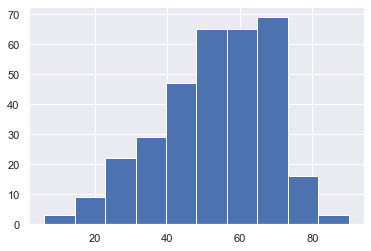

In [43]:

df1["age"].hist()

In [44]:
#from diagram its clear that there are outliers both at lower and upper point
#use min max scaler
df1["age"]=(df1["age"]-df1["age"].min())/(df1["age"].max()-df1["age"].min())
df1["age"].describe()


count    328.000000
mean       0.560540
std        0.185037
min        0.000000
25%        0.452381
50%        0.583333
75%        0.702381
max        1.000000
Name: age, dtype: float64

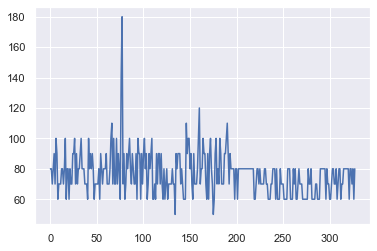

In [45]:
plt.plot(df1["bp"])

In [46]:
df1["bp"]=(df1["bp"]-df1["bp"].min())/(df1["bp"].max()-df1["bp"].min())
df1["bp"].describe()

count    328.000000
mean       0.204972
std        0.106695
min        0.000000
25%        0.153846
50%        0.230769
75%        0.230769
max        1.000000
Name: bp, dtype: float64

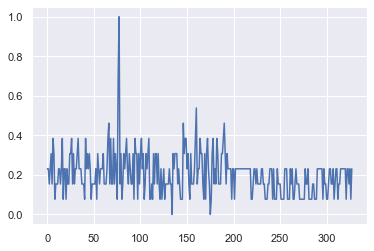

In [47]:
plt.plot(df1["bp"])

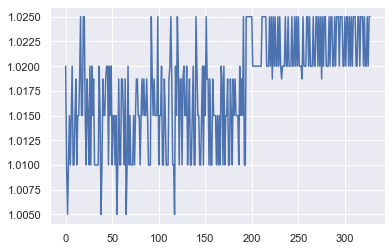

In [48]:
plt.plot(df1["sg"])

In [49]:
df1["sg"]=(df1["sg"]-df1["sg"].min())/(df1["sg"].max()-df1["sg"].min())
df1["sg"].describe()

count    328.000000
mean       0.644932
std        0.268298
min        0.000000
25%        0.500000
50%        0.685200
75%        0.750000
max        1.000000
Name: sg, dtype: float64

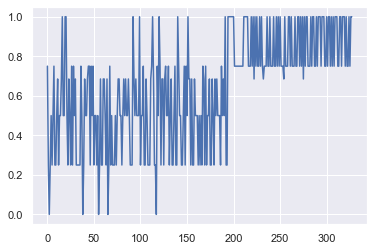

In [50]:
plt.plot(df1["sg"])

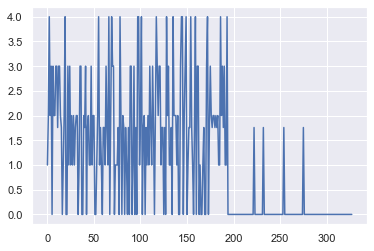

In [51]:
plt.plot(df1["al"])

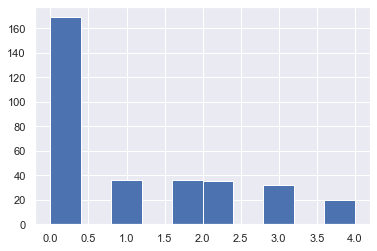

In [52]:
df["al"].hist()

In [53]:
df1["al"]=(df1["al"]-df1["al"].min())/(df1["al"].max())
df1["al"].describe()

count    328.000000
mean       0.263190
std        0.318815
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: al, dtype: float64

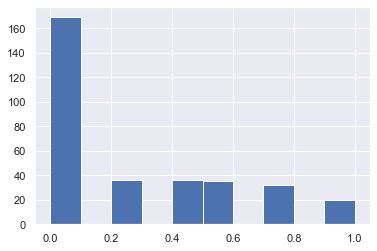

In [54]:
df1["al"].hist()


In [55]:
pd.set_option('display.max_columns', None)
df1.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0,0.500000,0.230769,0.75,0.25,0,0,0,0,0,121,36.0,1.2,138,5.0,15.4,44,7800,5.2,1,1,0,1,0,0,1
1,1,0.666667,0.230769,0.25,0.50,3,0,0,0,0,423,53.0,1.8,138,5.0,9.6,31,7500,5.2,0,1,0,0,0,1,1
2,2,0.500000,0.153846,0.00,1.00,0,0,1,1,0,117,56.0,3.8,111,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,1
3,3,0.535714,0.230769,0.25,0.50,0,0,0,0,0,106,26.0,1.4,138,5.0,11.6,35,7300,4.6,0,0,0,1,0,0,1
4,4,0.642857,0.307692,0.50,0.75,0,0,0,0,0,74,25.0,1.1,142,3.2,12.2,39,7800,4.4,1,1,0,1,1,0,1


In [56]:
df1["su"]=(df1["su"]-df1["su"].min())/(df1["su"].max())
df1["su"].describe()
df1.describe()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,163.500000,0.560540,0.204972,0.644932,0.263190,0.082927,0.106707,0.179878,0.112805,0.054878,148.134146,56.113415,2.792530,138.140244,4.704268,11.752134,39.765244,8039.329268,4.846037,0.381098,0.359756,0.088415,0.783537,0.182927,0.134146
std,94.829672,0.185037,0.106695,0.268298,0.318815,0.213206,0.309212,0.384673,0.316837,0.228090,78.611539,47.876197,4.361233,6.574334,3.106565,3.667853,8.480401,2705.800007,0.896706,0.486399,0.480662,0.284331,0.412463,0.387197,0.341330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,104.000000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.750000,0.452381,0.153846,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.750000,27.000000,0.900000,135.000000,3.900000,9.600000,33.000000,6700.000000,4.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,163.500000,0.583333,0.230769,0.685200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.500000,42.000000,1.300000,138.000000,4.600000,12.150000,42.000000,7000.000000,5.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,245.250000,0.702381,0.230769,0.750000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,64.250000,2.725000,141.000000,5.000000,14.800000,45.000000,9400.000000,5.200000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,327.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,48.100000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


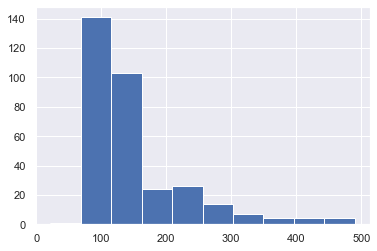

In [57]:
df1["bgr"].hist()

In [58]:
df1["bgr"]=(df1["bgr"]-df1["bgr"].min())/(df1["bgr"].max()-df1["bgr"].min())
df1["bgr"].describe()

count    328.000000
mean       0.269517
std        0.167973
min        0.000000
25%        0.166132
50%        0.212607
75%        0.301282
max        1.000000
Name: bgr, dtype: float64

In [59]:
df1["bu"]=(df1["bu"]-df1["bu"].min())/(df1["bu"].max()-df1["bu"].min())
df1["bu"].describe()

count    328.000000
mean       0.140214
std        0.122917
min        0.000000
25%        0.065469
50%        0.103979
75%        0.161104
max        1.000000
Name: bu, dtype: float64

In [60]:
df1["sc"]=(df1["sc"]-df1["sc"].min())/(df1["sc"].max()-df1["sc"].min())
df1["sc"].describe()

count    328.000000
mean       0.050158
std        0.091430
min        0.000000
25%        0.010482
50%        0.018868
75%        0.048742
max        1.000000
Name: sc, dtype: float64

In [61]:
df1["sod"]=(df1["sod"]-df1["sod"].min())/(df1["sod"].max()-df1["sod"].min())
df1["sod"].describe()

count    328.000000
mean       0.578648
std        0.111429
min        0.000000
25%        0.525424
50%        0.576271
75%        0.627119
max        1.000000
Name: sod, dtype: float64

In [62]:
df1["pot"]=(df1["pot"]-df1["pot"].min())/(df1["pot"].max()-df1["pot"].min())
df1["hemo"]=(df1["hemo"]-df1["hemo"].min())/(df1["hemo"].max()-df1["hemo"].min())
df1["wc"]=(df1["wc"]-df1["wc"].min())/(df1["wc"].max()-df1["wc"].min())
df1["pcv"]=(df1["pcv"]-df1["pcv"].min())/(df1["pcv"].max()-df1["pcv"].min())
df1["rc"]=(df1["rc"]-df1["rc"].min())/(df1["rc"].max()-df1["rc"].min())

df1.head(5)

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0,0.500000,0.230769,0.75,0.25,0.0,0,0,0,0,0.211538,0.088575,0.016771,0.576271,0.05618,0.836735,0.777778,0.231405,0.525424,1,1,0,1,0,0,1
1,1,0.666667,0.230769,0.25,0.50,0.6,0,0,0,0,0.856838,0.132221,0.029350,0.576271,0.05618,0.442177,0.488889,0.219008,0.525424,0,1,0,0,0,1,1
2,2,0.500000,0.153846,0.00,1.00,0.0,0,1,1,0,0.202991,0.139923,0.071279,0.118644,0.00000,0.551020,0.511111,0.185950,0.305085,1,0,0,0,1,1,1
3,3,0.535714,0.230769,0.25,0.50,0.0,0,0,0,0,0.179487,0.062901,0.020964,0.576271,0.05618,0.578231,0.577778,0.210744,0.423729,0,0,0,1,0,0,1
4,4,0.642857,0.307692,0.50,0.75,0.0,0,0,0,0,0.111111,0.060334,0.014675,0.644068,0.01573,0.619048,0.666667,0.231405,0.389831,1,1,0,1,1,0,1


In [63]:
df1.max()

Unnamed: 0    327.0
age             1.0
bp              1.0
sg              1.0
al              1.0
su              1.0
rbc             1.0
pc              1.0
pcc             1.0
ba              1.0
bgr             1.0
bu              1.0
sc              1.0
sod             1.0
pot             1.0
hemo            1.0
pcv             1.0
wc              1.0
rc              1.0
htn             1.0
dm              1.0
cad             1.0
appet           1.0
pe              1.0
ane             1.0
class           1.0
dtype: float64

In [64]:
df1.to_csv("wranglingdone_kidney1.csv")

In [65]:
df["pcv"]



0      44
1      31
2      32
3      35
4      39
5      36
6      33
7      29
8      28
9      32
10     28
11     44
12     16
13     24
14     44
15     44
16     37
17     30
18     24
19     32
20     29
21     35
22     37
23     44
24     30
25     34
26     29
27     44
28     36
29     32
       ..
298    46
299    50
300    51
301    52
302    47
303    40
304    48
305    53
306    49
307    50
308    54
309    40
310    51
311    49
312    42
313    52
314    43
315    50
316    46
317    52
318    52
319    44
320    46
321    54
322    45
323    47
324    54
325    49
326    51
327    53
Name: pcv, Length: 328, dtype: object

In [66]:
df1["sc"]

0      0.016771
1      0.029350
2      0.071279
3      0.020964
4      0.014675
5      0.494759
6      0.031447
7      0.142558
8      0.075472
9      0.048218
10     0.035639
11     0.088050
12     0.077568
13     0.192872
14     0.037736
15     0.100629
16     0.018868
17     0.025157
18     0.073375
19     0.153040
20     0.031447
21     0.041929
22     0.048218
23     0.020964
24     0.023061
25     0.023061
26     0.044025
27     0.100629
28     0.033543
29     0.029350
         ...   
298    0.008386
299    0.016771
300    0.002096
301    0.010482
302    0.012579
303    0.016771
304    0.002096
305    0.014675
306    0.006289
307    0.004193
308    0.014675
309    0.002096
310    0.008386
311    0.006289
312    0.014675
313    0.004193
314    0.002096
315    0.010482
316    0.016771
317    0.006289
318    0.008386
319    0.014675
320    0.016771
321    0.006289
322    0.008386
323    0.002096
324    0.016771
325    0.004193
326    0.012579
327    0.014675
Name: sc, Length: 328, d

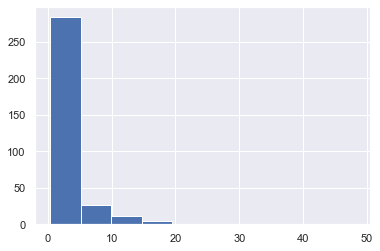

In [67]:
df["sc"].hist()
df3=pd.read_csv("missingremoved_kidney.csv")
def noncatcanv(dfnew):
    dfnew["pot"]=(dfnew["pot"]-df3["pot"].min())/(df3["pot"].max()-df3["pot"].min())
    dfnew["hemo"]=(dfnew["hemo"]-df3["hemo"].min())/(df3["hemo"].max()-df3["hemo"].min())
    dfnew["wc"]=(dfnew["wc"]-df3["wc"].min())/(df3["wc"].max()-df3["wc"].min())
    dfnew["pcv"]=(dfnew["pcv"]-df3["pcv"].min())/(df3["pcv"].max()-df3["pcv"].min())
    dfnew["rc"]=(dfnew["rc"]-df3["rc"].min())/(df3["rc"].max()-df3["rc"].min())
    dfnew["sod"]=(dfnew["sod"]-df3["sod"].min())/(df3["sod"].max()-df3["sod"].min())
    dfnew["sc"]=(dfnew["sc"]-df3["sc"].min())/(df3["sc"].max()-df3["sc"].min())
    dfnew["bu"]=(dfnew["bu"]-df3["bu"].min())/(df3["bu"].max()-df3["bu"].min())
    dfnew["al"]=(dfnew["al"]-df3["al"].min())/(df3["al"].max())
    dfnew["sg"]=(dfnew["sg"]-df3["sg"].min())/(df3["sg"].max()-df3["sg"].min())
    dfnew["bp"]=(dfnew["bp"]-df3["bp"].min())/(df3["bp"].max()-df3["bp"].min())
    dfnew["su"]=(dfnew["su"]-df3["su"].min())/(df3["su"].max())
    dfnew["age"]=(dfnew["age"]-df3["age"].min())/(df3["age"].max()-df3["age"].min())
    dfnew["bgr"]=(dfnew["bgr"]-df3["bgr"].min())/(df3["bgr"].max()-df3["bgr"].min())


# Knn algorithm applying

In [68]:
len(df1.columns)
df1

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0,0.500000,0.230769,0.7500,0.250000,0.0,0,0,0,0,0.211538,0.088575,0.016771,0.576271,0.056180,0.836735,0.777778,0.231405,0.525424,1,1,0,1,0,0,1
1,1,0.666667,0.230769,0.2500,0.500000,0.6,0,0,0,0,0.856838,0.132221,0.029350,0.576271,0.056180,0.442177,0.488889,0.219008,0.525424,0,1,0,0,0,1,1
2,2,0.500000,0.153846,0.0000,1.000000,0.0,0,1,1,0,0.202991,0.139923,0.071279,0.118644,0.000000,0.551020,0.511111,0.185950,0.305085,1,0,0,0,1,1,1
3,3,0.535714,0.230769,0.2500,0.500000,0.0,0,0,0,0,0.179487,0.062901,0.020964,0.576271,0.056180,0.578231,0.577778,0.210744,0.423729,0,0,0,1,0,0,1
4,4,0.642857,0.307692,0.5000,0.750000,0.0,0,0,0,0,0.111111,0.060334,0.014675,0.644068,0.015730,0.619048,0.666667,0.231405,0.389831,1,1,0,1,1,0,1
5,5,0.738095,0.153846,0.2500,0.000000,0.0,0,0,0,0,0.166667,0.134788,0.494759,0.000000,0.033708,0.632653,0.600000,0.185950,0.525424,0,0,0,1,0,0,1
6,6,0.547619,0.384615,0.5000,0.750000,0.0,0,1,1,0,0.247863,0.150193,0.031447,0.576271,0.056180,0.523810,0.533333,0.305785,0.322034,1,1,0,1,0,1,1
7,7,0.559524,0.307692,0.7500,0.500000,0.0,1,1,1,0,0.102564,0.270860,0.142558,0.169492,0.026966,0.435374,0.444444,0.409091,0.271186,1,1,0,0,0,1,1
8,8,0.523810,0.076923,0.2500,0.500000,0.8,0,1,1,0,1.000000,0.137356,0.075472,0.576271,0.056180,0.428571,0.422222,0.185950,0.525424,1,1,0,1,0,1,1
9,9,0.678571,0.153846,0.2500,0.750000,0.0,1,1,1,0,0.764957,0.150193,0.048218,0.457627,0.038202,0.523810,0.511111,0.095041,0.288136,1,1,0,0,1,0,1


In [69]:
#split data into x and y
X = df1.iloc[:, 1:-1].values
y = df1.iloc[:, 25].values
y=y.astype('int')
# train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [70]:
y_pred = classifier.predict(X_test)
#classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  0]
 [ 1 37]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        38

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



In [71]:
#abc=["0.440476","0.076923","1.0000","0.000000",0.0	0	0	0	0	0.202991	0.111682	0.006289	0.627119	0.042697	0.673469	1.000000	0.214876	0.559322	0	0	0	1	0	0	0]
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [90]:
abc=[[0.40476190476190477, 0.23076923076923078, 0.7500000000000056,
        0.0, 0, 0, 0, 0, 0, 3.2, 0.03465982028241335,
        0.0062893081761006275, 0.7796610169491526, 0.05393258426966293,
        0.12925170068027209, 0.7777777777777778, 0.1859504132231405,
        0.5254237288135593, 0, 0, 0, 1, 0, 0]]
cde=[[0.40476190476190477, 0.23076923076923078, 0.7500000000000056,
        0.0, 0.0, 0, 0, 0, 0, 0.20726495726495728, 0.03465982028241335,
        0.0062893081761006275, 0.7796610169491526, 0.05393258426966293,
        0.12925170068027209, 0.7777777777777778, 0.1859504132231405,
        0.5254237288135593, 0, 0, 0, 1, 0, 0]]
print(classifier.predict(abc))
print(classifier.predict(cde))
def result(dfnew):
    catconversion(dfnew)
    noncatcanv(dfnew)
    news=[];
    out=classifier.predict(dfnew)
    for i in out:
        if(out[i-1]==1):
            news.append("bad news you have ckd")
        else:
            news.append("no ckd")
    return news
dfnew=pd.read_csv("missingremoved_kidney.csv")

result(dfnew.iloc[67:70,1:-1])



[1]
[0]


['bad news you have ckd', 'bad news you have ckd', 'bad news you have ckd']

# error predication

In [ ]:
dfnew

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')